### ***Identifying customer segments based on transactional behavior and demographic information***

In branding and customer analytics, it is standard practise to identify customer categories based on transactional behaviour and demographic data. Businesses may modify marketing tactics, enhance customer experiences, and improve product offerings by analysing these data points to get insights into consumer preferences, requirements, and behaviours. Following is a step-by-step procedure for segmenting customers based on transactional behaviour and statistical data:

**1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### **2. Processing the data**

#### Loading the transactional data

In [2]:
for num in range(132):
  filename= f'/content/sample_data/dataset/transactions_{num}.csv'

  data = pd.read_csv(filename, delimiter='|')
  print(f'{filename}')
  print(data)

  new_file = f'/content/sample_data/dataset/new_transactions_{num}.csv'
  data.to_csv(new_file, index=False)

/content/sample_data/dataset/transactions_0.csv
                  cc_num      acct_num                         trans_num  \
0          4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1          4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2          4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3          4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4          4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                  ...           ...                               ...   
108123  3592927524372804  632265815336  b4f6bc50e8c25083554f7a6365fbd020   
108124  3592927524372804  632265815336  a2eb246a2082a232256fdb91a115f574   
108125  3592927524372804  632265815336  58f1916fef29a345f45d3f99728b8bea   
108126  3592927524372804  632265815336  974d131d9a8894661dfd6bd034aa6511   
108127  3592927524372804  632265815336  90f6b22704e30cc8cfb7068104cc8b22   

         unix_time        category    a

#### Merging data to one file

In [3]:
import os
import csv 

directory = "/content/sample_data/dataset"
merged_filename = "transactions.csv"

# Creating a CSV writer object with '|' as the delimiter for the merged file
with open(os.path.join(directory, merged_filename), 'w', newline='') as outfile:
  writer = csv.writer(outfile, delimiter='|')

  # Loop through all the files that match the pattern
  for filename in glob.glob(directory + "/transactions_[0-9]*.csv"):

  # Open the file for reading
    with open(filename, 'r') as infile:

    # Creating a CSV reader object with '|' as the delimiter
      reader = csv.reader(infile, delimiter='|')
      
      # Loop through each row in the file and write it to the merged file
      for row in reader:
        writer.writerow(row)

trans= pd.read_csv('/content/sample_data/dataset/transactions.csv', delimiter='|')
trans.to_csv('transactions.csv', index=False)
trans

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,345331586923222,903253916954,e27acf7ff2e796804d189d09b6fc4318,1648136912,grocery_net,54.57,0,Solis-Carlson,39.261204,-74.917412
1,345331586923222,903253916954,8738514f11d4bd8efeedbe72830bbb13,1645461229,gas_transport,55.63,0,"Collins, Kramer and Shaw",40.320181,-74.315647
2,345331586923222,903253916954,21c4b7105a1665323d3d2905a08f0c6d,1643817753,gas_transport,35.27,0,"Mcgee, Smith and Schroeder",39.192935,-74.892697
3,345331586923222,903253916954,99b32dab08deb551530fb4122bae8593,1642861828,gas_transport,81.31,0,"Jacobs, Miller and Hayes",39.275767,-75.813709
4,345331586923222,903253916954,b0e5828a5ec6e503e93b269a5834b149,1648942439,grocery_pos,61.92,0,Sullivan PLC,40.254785,-76.18864
...,...,...,...,...,...,...,...,...,...,...
4261030,6584732365337749,843643900137,7b2b63508d92d5dd61446fb5cb03e301,1667282786,personal_care,5.74,0,Dennis Inc,44.17282,-90.422277
4261031,6584732365337749,843643900137,1df5a10b715d536a666143ebb429a818,1591184669,misc_pos,8.28,0,"Beck, Mcneil and Benjamin",43.413139,-91.058986
4261032,6584732365337749,843643900137,67f8305d28b564b34ccf264b9f4ea764,1625045557,food_dining,9.98,0,Lee-Schneider,43.853512,-90.834174
4261033,6584732365337749,843643900137,4d3333cd26ba3ac993151b30b474e94e,1667465864,personal_care,9.42,0,Benson Inc,43.025016,-91.550511


#### Loading customer data

In [4]:
data = pd.read_csv('/content/sample_data/dataset/customers.csv',delimiter='|')
print(data)
data.to_csv('customers.csv',index=False)

             ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler    PA  19002  40.1809   
1         3

In [5]:
cus = pd.read_csv('customers.csv')
cus.head(10)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
5,246-08-3947,3517182278248964,Vincent,Hickman,M,465 Lam Mission,Forsyth,GA,31029,33.0508,-83.9362,16287,Community arts worker,1976-06-18,245877882397
6,347-03-9639,213193010310510,Kayla,Ramirez,F,82997 Kristen Valley Suite 311,Patterson,LA,70392,29.6967,-91.2812,8456,Plant breeder/geneticist,1939-03-06,465378164447
7,479-94-0888,4065133387262473,Danielle,Leblanc,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,1973-12-27,950105810049
8,061-22-6210,630447468723,Cheryl,Robinson,F,805 Brendan Neck,Lakewood,CA,90715,33.8405,-118.0767,79812,Retail buyer,2002-08-23,940251608167
9,162-08-8321,2222913619399092,Bradley,Sandoval,M,3534 Anderson Rue Suite 751,Glendale,CA,91202,34.1652,-118.2656,172817,Acupuncturist,1985-01-26,684868121383


### **Exploring the data**

#### Finding null values

In [6]:
trans.isnull().sum()

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [7]:
cus.isnull().sum()

ssn         0
cc_num      0
first       0
last        0
gender      0
street      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
dob         0
acct_num    0
dtype: int64

In [8]:
trans.dtypes

cc_num        object
acct_num      object
trans_num     object
unix_time     object
category      object
amt           object
is_fraud      object
merchant      object
merch_lat     object
merch_long    object
dtype: object

In [9]:
cus.dtypes

ssn          object
cc_num        int64
first        object
last         object
gender       object
street       object
city         object
state        object
zip           int64
lat         float64
long        float64
city_pop      int64
job          object
dob          object
acct_num      int64
dtype: object

Merging customers and transactional data

In [10]:
merged_data = pd.merge(trans,cus,on='acct_num')
print(merged_data.columns)

Index(['cc_num_x', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'cc_num_y',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob'],
      dtype='object')


Saving the dataframe in a new csv file

In [11]:
merged_data.to_csv('merged_data.csv', index=False)
m_data = pd.read_csv('merged_data.csv')
m_data.head(7)

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,676305278100,930558644123,34821a75f2a6ef420bfe6b775ef7ebb6,1558633432,grocery_net,196.24,0,"Buckley, Hicks and Cardenas",29.523647,-99.792043,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
1,676305278100,930558644123,47504e5f0f060d0ba136241a7381d78c,1572390467,grocery_pos,198.80,0,Love-Anderson,29.183594,-100.726474,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
2,676305278100,930558644123,330ac8785c386bcfedccda9450c6fcf1,1547506176,gas_transport,224.06,0,"Parrish, Jones and Perez",29.385604,-99.819727,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
3,676305278100,930558644123,bf1b90eb153d61172bdaec4698e71b90,1553981956,grocery_net,211.69,0,Durham-Castillo,28.597910,-101.297027,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
4,676305278100,930558644123,663a9e929cebced05428ec8a4293b0c6,1547666941,gas_transport,223.50,0,Perez-Brown,28.874921,-100.368831,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
5,676305278100,930558644123,b9055adc45accd9f0abf0a3bbebac137,1576777975,misc_net,185.43,0,Thomas LLC,28.061927,-101.199775,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
6,676305278100,930558644123,218cfc86fddc0af02f557cee48df8465,1559252707,grocery_net,229.89,0,Cruz-Chase,29.250376,-100.901874,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04


#### **Exploring merged data**

#### Finding missing values in merged data

In [12]:
m_data.isnull().sum()

cc_num_x      0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
ssn           0
cc_num_y      0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
dtype: int64

In [13]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574059 entries, 0 to 1574058
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num_x    1574059 non-null  int64  
 1   acct_num    1574059 non-null  int64  
 2   trans_num   1574059 non-null  object 
 3   unix_time   1574059 non-null  int64  
 4   category    1574059 non-null  object 
 5   amt         1574059 non-null  float64
 6   is_fraud    1574059 non-null  int64  
 7   merchant    1574059 non-null  object 
 8   merch_lat   1574059 non-null  float64
 9   merch_long  1574059 non-null  float64
 10  ssn         1574059 non-null  object 
 11  cc_num_y    1574059 non-null  int64  
 12  first       1574059 non-null  object 
 13  last        1574059 non-null  object 
 14  gender      1574059 non-null  object 
 15  street      1574059 non-null  object 
 16  city        1574059 non-null  object 
 17  state       1574059 non-null  object 
 18  zip         1574059 no

In [14]:
m_data.describe()

,cc_num_x,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long,cc_num_y,zip,lat,long,city_pop
count,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06
mean,3.411746e+17,4.765663e+11,1.610985e+09,7.165052e+01,6.689711e-04,3.741340e+01,-9.121251e+01,3.411746e+17,4.999059e+04,3.741357e+01,-9.121186e+01,3.217979e+05
std,1.192472e+18,2.843779e+11,3.653670e+07,1.554710e+02,2.585583e-02,5.332681e+00,1.653408e+01,1.192472e+18,2.940708e+04,5.300707e+00,1.652393e+01,6.227823e+05
min,6.040027e+10,2.348758e+09,1.546261e+09,1.000000e+00,0.000000e+00,1.870250e+01,-1.603677e+02,6.040027e+10,1.571000e+03,1.970250e+01,-1.593683e+02,8.670000e+02
25%,2.131042e+14,2.307161e+11,1.577574e+09,9.710000e+00,0.000000e+00,3.368105e+01,-9.802434e+01,2.131042e+14,2.386000e+04,3.377160e+01,-9.779560e+01,1.868700e+04
50%,3.533223e+15,4.559282e+11,1.609393e+09,4.617000e+01,0.000000e+00,3.843453e+01,-8.626362e+01,3.533223e+15,4.803800e+04,3.857730e+01,-8.624790e+01,6.554000e+04
75%,4.609380e+15,7.173788e+11,1.641035e+09,8.358000e+01,0.000000e+00,4.132451e+01,-7.915028e+01,4.609380e+15,7.804000e+04,4.128000e+01,-7.896040e+01,2.156190e+05
max,4.983666e+18,9.993899e+11,1.672492e+09,3.177259e+04,1.000000e+00,6.263027e+01,-6.897910e+01,4.983666e+18,9.964500e+04,6.163030e+01,-6.997790e+01,2.906700e+06


##### **Visualizing Transaction Density**

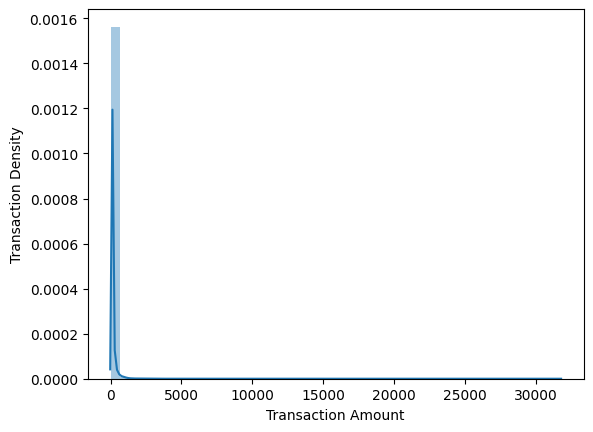

In [15]:
sns.distplot(m_data['amt'])
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Density");

##### **Deriving customer's age from date of birth**

In [16]:
m_data['dob'] = pd.to_datetime(m_data['dob'])
m_data['age'] = (pd.to_datetime('today') - m_data['dob']).astype('<m8[Y]')
m_data['age']

0          26.0
1          26.0
2          26.0
3          26.0
4          26.0
           ... 
1574054    28.0
1574055    28.0
1574056    28.0
1574057    28.0
1574058    28.0
Name: age, Length: 1574059, dtype: float64

##### **Creating bar plot to visualize the number of customers in different age group**

In [17]:
ages = np.array(m_data['age'])
transaction_amounts = np.array(m_data['amt'])

age_groups = [(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,90),(90,100)]
avg_transaction_amounts = list()
midpoints = list()

for age_group in age_groups:
    lower_bound, upper_bound = age_group
    mask = (ages >= lower_bound) & (ages < upper_bound)
    group_avg = np.mean(transaction_amounts[mask])
    avg_transaction_amounts.append(group_avg)
    midpoints.append((lower_bound + upper_bound) / 2)

##### **Creating line plot to identify any shifts or patterns in the amount of transactions as age increases.**

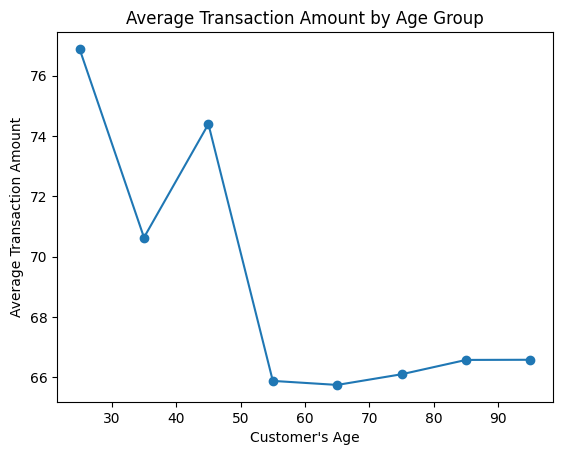

In [18]:
plt.plot(midpoints, avg_transaction_amounts, marker='o')
plt.xlabel("Customer's Age")
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Age Group')
plt.show()

##### **Creating bar chart to illustrate the distribution of ages by gender**

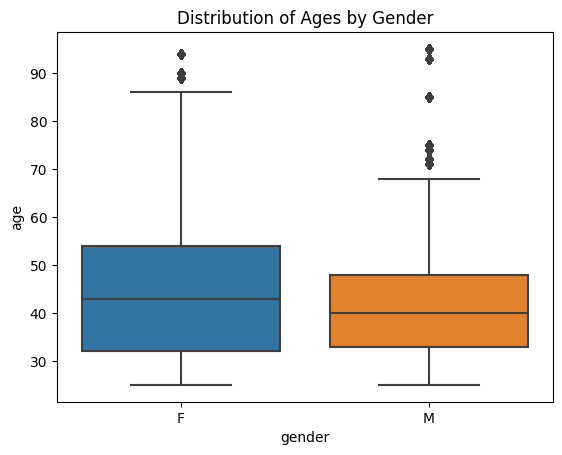

In [19]:
sns.boxplot(data=m_data,x='gender',y='age')
plt.title("Distribution of Ages by Gender");

##### **Creating scatter plot to illustrate the average transaction amounts between various employment occupations**

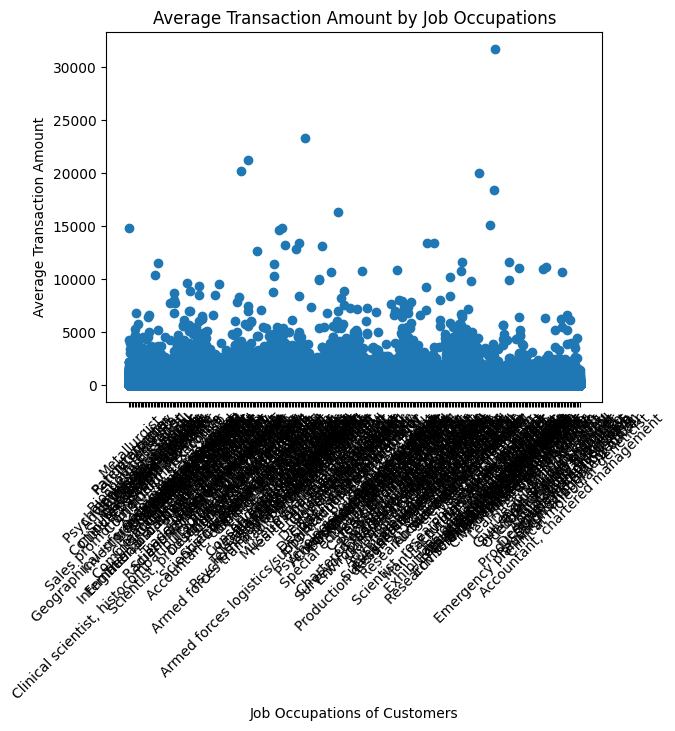

In [20]:
plt.scatter(data=m_data, x='job', y='amt')
plt.xlabel('Job Occupations of Customers')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Job Occupations')
plt.xticks(rotation=45)
plt.show()

#### **Creating new features for segmenting customers based on their transactions**

In [21]:
frequency_of_purchase = m_data.groupby('acct_num')['trans_num'].count().reset_index()
frequency_of_purchase.rename(columns={'trans_num':'frequency_of_purchase'}, inplace=True)
m_data = pd.merge(m_data, frequency_of_purchase, on='acct_num',how='left')

In [22]:
m_data['frequency_of_purchase']

0          2550
1          2550
2          2550
3          2550
4          2550
           ... 
1574054    1195
1574055    1195
1574056    1195
1574057    1195
1574058    1195
Name: frequency_of_purchase, Length: 1574059, dtype: int64

In [23]:
average_purchase_value = m_data.groupby('acct_num')['amt'].mean().reset_index()
average_purchase_value.rename(columns={'amt':'average_purchase_value'},inplace=True)
m_data = pd.merge(m_data, average_purchase_value, on='acct_num',how='left')

In [24]:
m_data['average_purchase_value']

0          83.110467
1          83.110467
2          83.110467
3          83.110467
4          83.110467
             ...    
1574054    51.540929
1574055    51.540929
1574056    51.540929
1574057    51.540929
1574058    51.540929
Name: average_purchase_value, Length: 1574059, dtype: float64

In [25]:
total_spending = m_data.groupby('acct_num')['amt'].sum().reset_index()
total_spending.rename(columns={'amt':'total_spending'},inplace=True)
m_data =pd.merge(m_data,total_spending,on='acct_num',how='left')

In [26]:
m_data['total_spending']

0          211931.69
1          211931.69
2          211931.69
3          211931.69
4          211931.69
             ...    
1574054     61591.41
1574055     61591.41
1574056     61591.41
1574057     61591.41
1574058     61591.41
Name: total_spending, Length: 1574059, dtype: float64

In [27]:
m_data['unix_time'] = pd.to_datetime(m_data['unix_time'], unit='s')
first_transaction_time = m_data.groupby('acct_num')['unix_time'].min().reset_index()
first_transaction_time['recency_of_purchase'] = (pd.to_datetime('today') - first_transaction_time['unix_time']).dt.days
m_data = pd.merge(m_data, first_transaction_time[['acct_num','recency_of_purchase']], on='acct_num', how='left')

In [28]:
m_data['recency_of_purchase']

0          1605
1          1605
2          1605
3          1605
4          1605
           ... 
1574054    1601
1574055    1601
1574056    1601
1574057    1601
1574058    1601
Name: recency_of_purchase, Length: 1574059, dtype: int64

#### **Using K-means clustering for customer segmentation based on transactional behavior and demographic information**

Assigning numerical labels to each unique gender

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
m_data['gender'] = label_encoder.fit_transform(m_data['gender'])


In [30]:
selected_features = m_data[['frequency_of_purchase', 'average_purchase_value', 'total_spending','recency_of_purchase', 'age','gender']]

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(selected_features)

##### **Applying Elbow Method to determine the optimum number of clusters to which the data maybe clustered**

In [32]:
wcss = []  #within clusters sum of squares

for iter in range(1,11):
  kmeans = KMeans(n_clusters=iter, init='k-means++', random_state = 0)
  kmeans.fit(selected_features)
  wcss.append(kmeans.inertia_)

print("Within Cluster Sum of Squares (WCSS):", wcss)  

Within Cluster Sum of Squares (WCSS): [5.74906976623925e+16, 1.6541108181070272e+16, 7092002487194571.0, 3590850486201102.0, 2394022680913940.5, 1517826131720211.8, 905518767908902.2, 456518081870780.5, 355596196169811.4, 267636239908384.88]


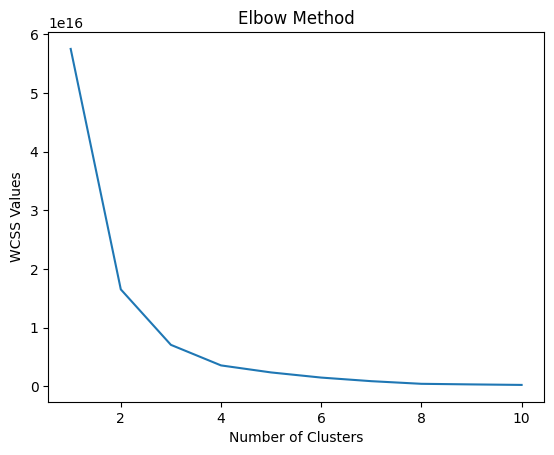

In [33]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Values")
plt.show()

##### We can see the plot reduces drastically from cluster number 1-3 and flattens from 4-10. Hence, we are getting an elbow at K=3. Thus, we can assign number of clusters as K=3. 

In [34]:
#Initializing model
kmeansmodel = KMeans(n_clusters = 3, init="k-means++", random_state=0)

In [35]:
y_km = kmeansmodel.fit_predict(selected_features)

In [36]:
X = np.array(selected_features)

In [69]:
c_labels = kmeans.fit_predict(X)

# Calculating the number of customers in each cluster
cluster_counts = {}
for label in c_labels:
    if label in cluster_counts:
        cluster_counts[label] += 1
    else:
        cluster_counts[label] = 1

# Sorting the clusters based on the number of customers
sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)

# Selecting the top 100 customers from the clusters
selected_customers = []
count = 0
for cluster, _ in sorted_clusters:
    cluster_indices = [i for i, label in enumerate(c_labels) if label == cluster]
    cluster_customers = X[cluster_indices]
    selected_customers.extend(cluster_customers)
    count += len(cluster_customers)
    if count >= 100:
        break

# selected_customers now contains the top 100 customers from the clusters

In [62]:
top_customers = np.array(selected_customers)

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Performing K-means clustering on the top 100 customers

kmeans = KMeans(n_clusters=3)
cluster_labels_top_c = kmeans.fit_predict(top_customers)

# Calculating the silhouette score
silhouette_avg = silhouette_score(top_customers, cluster_labels_top_c)

print("The silhouette score for the top 100 customers is:", silhouette_avg)


The silhouette score for the top 100 customers is: 0.7447968981996144


In [37]:
clusters = kmeansmodel.cluster_centers_
clusters

array([[3.25951528e+03, 6.60043545e+01, 2.12062975e+05, 1.59594192e+03,
        5.12508051e+01, 5.32469141e-01],
       [5.98339039e+03, 7.07676126e+01, 4.13514416e+05, 1.60146643e+03,
        3.72660538e+01, 5.93732546e-01],
       [7.90042941e+03, 8.85418635e+01, 6.98918173e+05, 1.60577185e+03,
        3.70967813e+01, 1.15246701e-12]])

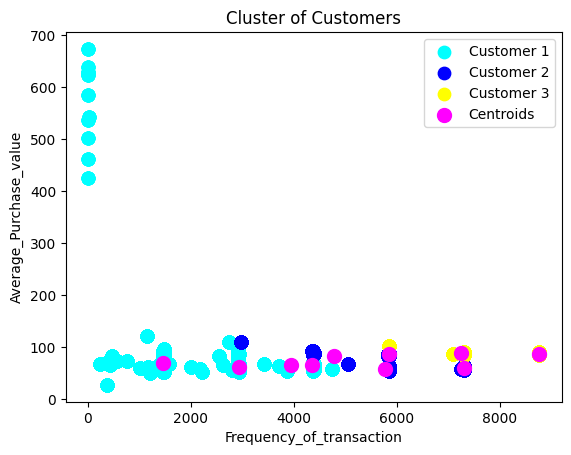

In [38]:
plt.scatter(X[y_km == 0,0], X[y_km == 0,1], s=80, c='cyan', label="Customer 1")
plt.scatter(X[y_km == 1,0], X[y_km == 1,1], s=80, c='blue', label="Customer 2")
plt.scatter(X[y_km == 2,0], X[y_km == 2,1], s=80, c='yellow', label="Customer 3")


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='magenta', label='Centroids')
plt.title("Cluster of Customers")
plt.xlabel("Frequency_of_transaction")
plt.ylabel("Average_Purchase_value")
plt.legend()
plt.show()

#### **Exploring the clusters**

In [39]:
from pandas.io.parsers.readers import MANDATORY_DIALECT_ATTRS
cluster_km = kmeansmodel.labels_

m_data['cluster_km'] = cluster_km

#Analyzing the characteristics of each cluster to understand customer segments
for cluster in range(3):
    cluster_data = m_data[m_data['cluster_km'] == cluster]
    print(f"Cluster {cluster}:\n")
    print(cluster_data.describe())  # You can print statistics or perform further analysis for each cluster

Cluster 0:

           cc_num_x      acct_num            amt       is_fraud  \
count  7.589360e+05  7.589360e+05  758936.000000  758936.000000   
mean   3.025036e+17  4.881637e+11      66.004355       0.000895   
std    1.124582e+18  2.760079e+11     155.421528       0.029898   
min    6.040027e+10  2.348758e+09       1.000000       0.000000   
25%    3.866271e+13  2.687429e+11       8.870000       0.000000   
50%    2.717544e+15  4.759571e+11      45.030000       0.000000   
75%    4.467046e+15  7.173788e+11      80.700000       0.000000   
max    4.983666e+18  9.993899e+11   31772.590000       1.000000   

           merch_lat     merch_long      cc_num_y         gender  \
count  758936.000000  758936.000000  7.589360e+05  758936.000000   
mean       37.565845     -92.825955  3.025036e+17       0.532469   
std         5.664289      17.343759  1.124582e+18       0.498945   
min        18.702948    -160.367675  6.040027e+10       0.000000   
25%        33.477743    -102.168127  3.86627

In [40]:
m_data['Cluster'] = y_km

# Analyzing the differences between clusters
cluster_analysis = m_data.groupby('Cluster').mean()

# Displaying the cluster analysis results
print(cluster_analysis)

             cc_num_x      acct_num        amt  is_fraud  merch_lat  \
Cluster                                                               
0        3.025036e+17  4.881637e+11  66.004355  0.000895  37.565845   
1        5.163890e+17  4.700902e+11  70.767613  0.000472  36.675119   
2        1.133942e+17  4.575788e+11  88.541863  0.000433  38.401446   

         merch_long      cc_num_y    gender           zip        lat  \
Cluster                                                                
0        -92.825955  3.025036e+17  0.532469  52801.402222  37.566728   
1        -89.151974  5.163890e+17  0.593733  45828.831242  36.674721   
2        -90.768206  1.133942e+17  0.000000  50300.554435  38.400821   

              long       city_pop        age  frequency_of_purchase  \
Cluster                                                               
0       -92.826518  307985.594590  51.250805            3259.515279   
1       -89.149750  308676.164082  37.266054            5983.390393   

#### **Applying BIRCH Algorithm (Balanced Iterative Reducing and Clustering using Hierarchies)**

In [41]:
from sklearn.cluster import Birch

selected_features = m_data[['frequency_of_purchase', 'average_purchase_value', 'total_spending','recency_of_purchase', 'age','gender']]
scaler = StandardScaler()
scaled = scaler.fit_transform(selected_features)

birch = Birch(n_clusters=3)
birch.fit(scaled)

y_pred_b = birch.predict(scaled)

In [42]:
m_data['cluster_birch'] = y_pred_b

# Analyzing the clusters
cluster_centers = birch.subcluster_centers_
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} Center:")
    print(center)
    print()

# Printing the count of customers in each cluster
print(m_data['cluster_birch'].value_counts())

Cluster 1 Center:
[-0.99681616 -0.85379866 -1.0072781   0.0939972   0.13523105  1.08787676]

Cluster 2 Center:
[ 0.41629828 -0.95427045 -0.13515728  0.10432395 -0.94693431  1.08787676]

Cluster 3 Center:
[-1.72689899 -0.76955742 -1.47357415  0.06994274  0.15283026  1.08787676]

Cluster 4 Center:
[-1.10815027 -0.97358007 -1.10224301  0.09152295 -0.61462293  1.08787676]

Cluster 5 Center:
[ 1.09804249 -0.89047505  0.33087614  0.10351446 -0.69858832  1.08787676]

Cluster 6 Center:
[ 0.58633928 -0.86596141  0.01582774  0.10406708  0.01703867  1.08787676]

Cluster 7 Center:
[-0.28841503 -0.89978162 -0.56264372  0.09738153 -0.05890766  1.08787676]

Cluster 8 Center:
[-0.30400666 -0.88422938 -0.56767322  0.1046307  -0.95954564  1.08787676]

Cluster 9 Center:
[-1.66562382 -0.6088624  -1.41419641  0.06702248  1.12231189  1.08787676]

Cluster 10 Center:
[-0.90913563 -0.48614252 -0.86373815  0.09398024  0.90833     1.08787676]

Cluster 11 Center:
[-0.30390887 -0.42099969 -0.41701498  0.09939203  

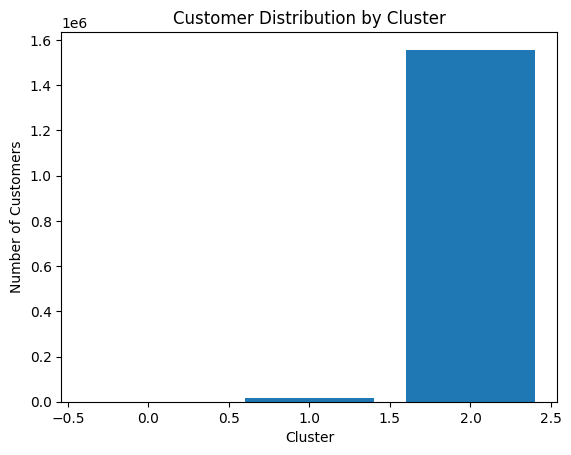

In [43]:
cluster_counts = m_data['cluster_birch'].value_counts()
# Creating bar plot
plt.bar(cluster_counts.index, cluster_counts.values)

# Setting plot labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Cluster')

# Showing the plot
plt.show()

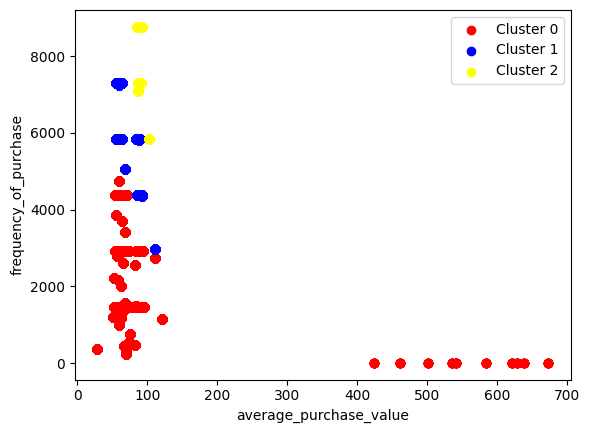

In [44]:
# Create scatter plot
feature1 = 'average_purchase_value'
feature2 = 'frequency_of_purchase'
feature3 = 'total_spending'
plt.scatter(m_data[m_data['Cluster'] == 0][feature1], m_data[m_data['Cluster'] == 0][feature2], color='red', label='Cluster 0')
plt.scatter(m_data[m_data['Cluster'] == 1][feature1], m_data[m_data['Cluster'] == 1][feature2], color='blue', label='Cluster 1')
plt.scatter(m_data[m_data['Cluster'] == 2][feature1], m_data[m_data['Cluster'] == 2][feature2], color='yellow', label='Cluster 2')

# Adding scatter plots for other clusters

# Setting plot labels and legend
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

# Showing the plot
plt.show()

In [45]:
m_data

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,job,dob,age,frequency_of_purchase,average_purchase_value,total_spending,recency_of_purchase,cluster_km,Cluster,cluster_birch
0,676305278100,930558644123,34821a75f2a6ef420bfe6b775ef7ebb6,2019-05-23 17:43:52,grocery_net,196.24,0,"Buckley, Hicks and Cardenas",29.523647,-99.792043,...,"Psychologist, educational",1996-12-04,26.0,2550,83.110467,211931.69,1605,0,0,2
1,676305278100,930558644123,47504e5f0f060d0ba136241a7381d78c,2019-10-29 23:07:47,grocery_pos,198.80,0,Love-Anderson,29.183594,-100.726474,...,"Psychologist, educational",1996-12-04,26.0,2550,83.110467,211931.69,1605,0,0,2
2,676305278100,930558644123,330ac8785c386bcfedccda9450c6fcf1,2019-01-14 22:49:36,gas_transport,224.06,0,"Parrish, Jones and Perez",29.385604,-99.819727,...,"Psychologist, educational",1996-12-04,26.0,2550,83.110467,211931.69,1605,0,0,2
3,676305278100,930558644123,bf1b90eb153d61172bdaec4698e71b90,2019-03-30 21:39:16,grocery_net,211.69,0,Durham-Castillo,28.597910,-101.297027,...,"Psychologist, educational",1996-12-04,26.0,2550,83.110467,211931.69,1605,0,0,2
4,676305278100,930558644123,663a9e929cebced05428ec8a4293b0c6,2019-01-16 19:29:01,gas_transport,223.50,0,Perez-Brown,28.874921,-100.368831,...,"Psychologist, educational",1996-12-04,26.0,2550,83.110467,211931.69,1605,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574054,6584732365337749,843643900137,7b2b63508d92d5dd61446fb5cb03e301,2022-11-01 06:06:26,personal_care,5.74,0,Dennis Inc,44.172820,-90.422277,...,"Editor, film/video",1995-03-11,28.0,1195,51.540929,61591.41,1601,0,0,2
1574055,6584732365337749,843643900137,1df5a10b715d536a666143ebb429a818,2020-06-03 11:44:29,misc_pos,8.28,0,"Beck, Mcneil and Benjamin",43.413139,-91.058986,...,"Editor, film/video",1995-03-11,28.0,1195,51.540929,61591.41,1601,0,0,2
1574056,6584732365337749,843643900137,67f8305d28b564b34ccf264b9f4ea764,2021-06-30 09:32:37,food_dining,9.98,0,Lee-Schneider,43.853512,-90.834174,...,"Editor, film/video",1995-03-11,28.0,1195,51.540929,61591.41,1601,0,0,2
1574057,6584732365337749,843643900137,4d3333cd26ba3ac993151b30b474e94e,2022-11-03 08:57:44,personal_care,9.42,0,Benson Inc,43.025016,-91.550511,...,"Editor, film/video",1995-03-11,28.0,1195,51.540929,61591.41,1601,0,0,2


#### **Performing clustering using Gaussian Mixture Model (GMM)**

In [46]:
from sklearn.mixture import GaussianMixture

# Performing Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3)  # Specifying the number of desired clusters
gmm.fit(scaled)

# Getting the predicted cluster labels
cluster_gm = gmm.predict(scaled)

# Adding the cluster labels to your original dataset
m_data['Cluster_gm'] = cluster_gm

# Analyzing the results

cluster_ct = m_data['Cluster_gm'].value_counts()
print(cluster_ct)

1    840431
0    711977
2     21651
Name: Cluster_gm, dtype: int64


In [ ]:
new_data = m_data[['frequency_of_purchase', 'average_purchase_value', 'total_spending','recency_of_purchase', 'age','gender','Cluster_gm']]

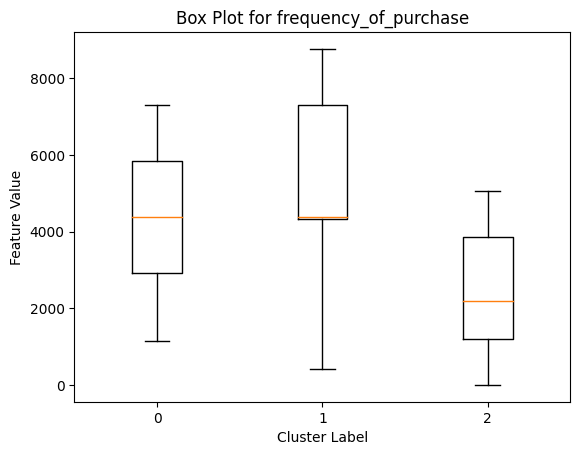

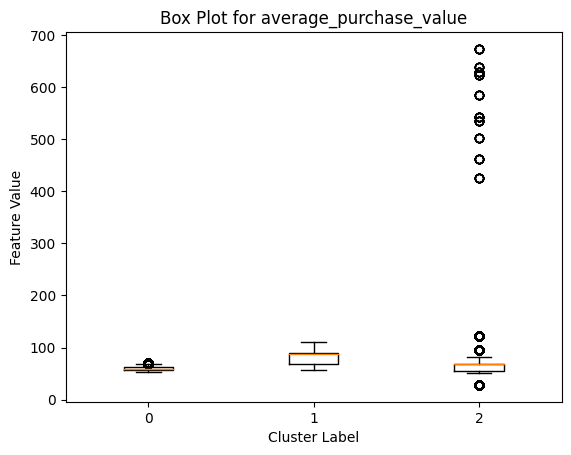

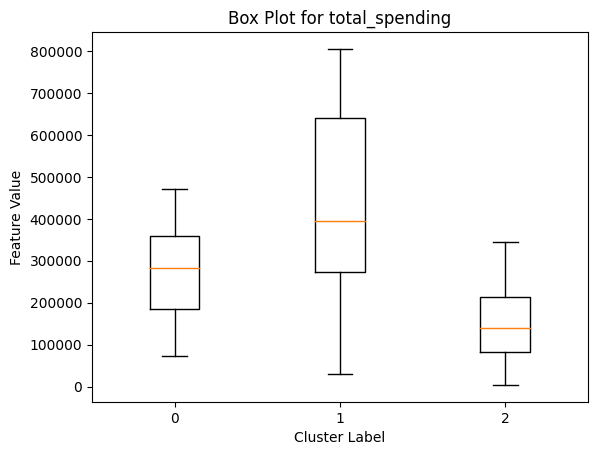

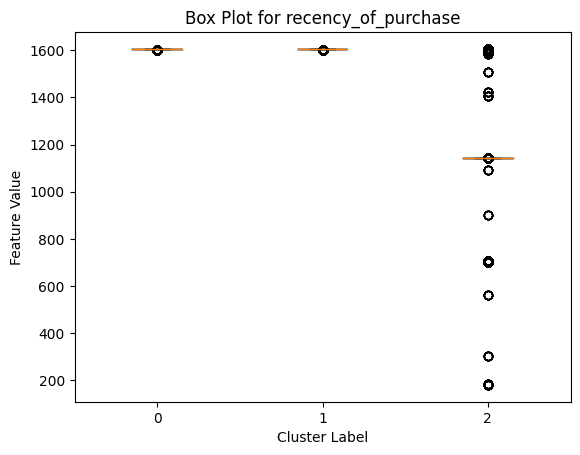

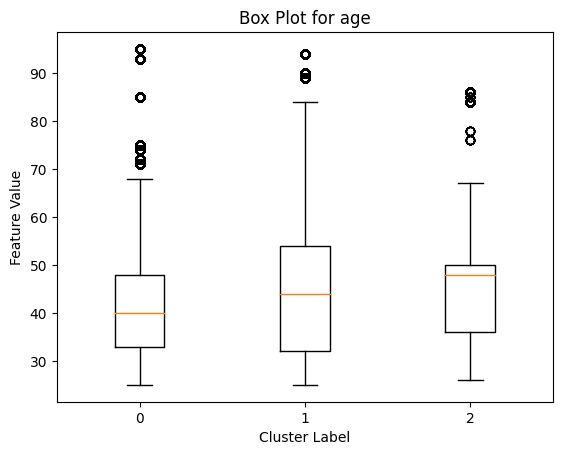

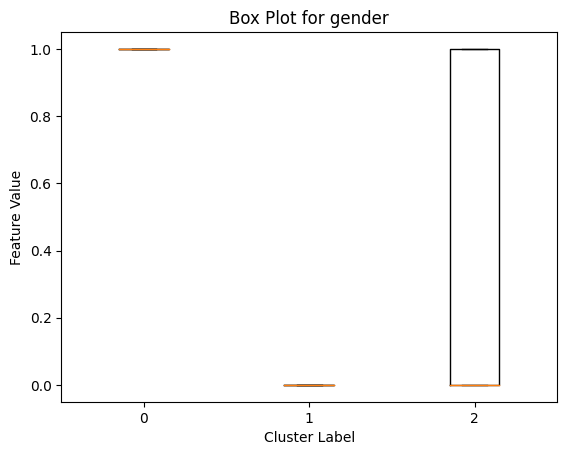

In [48]:
# Grouping the data by cluster labels
grouped = new_data.groupby('Cluster_gm')

# Iterating over each feature and create a box plot for each cluster
for feature in new_data.columns[:-1]:  # Exclude the last column (cluster labels)
    plt.figure()
    plt.title(f"Box Plot for {feature}")
    
    # Creating a list of data for each cluster
    df = [grouped.get_group(Cluster_gm)[feature] for Cluster_gm in grouped.groups]
    
    # Creating the box plot
    plt.boxplot(df, labels=grouped.groups.keys())
    plt.xlabel('Cluster Label')
    plt.ylabel('Feature Value')
    
    # Showing the plot
    plt.show()